In [1]:
import re
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## [Dataset 1  Kaggle](https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data)

In [2]:
data_train = pd.read_csv('data/train.csv', encoding = 'latin1') 
data_test = pd.read_csv('data/test.csv', encoding = 'latin1')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [4]:
data_train.head(1)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60


In [5]:
data_test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [6]:
data_test.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

# Select ROI columns

In [7]:
roi = ['sentiment', 'text']

In [8]:
data_train = data_train[roi]
data_test = data_test[roi]

In [9]:
data = pd.concat([data_train, data_test], ignore_index=True)

# Cleaning operations

In [10]:
print(f' Null values sentiment :{data.sentiment.isnull().sum()}')
print(f' Null values text :{data.text.isnull().sum()}')

 Null values sentiment :1281
 Null values text :1282


In [11]:
# discard null value
data = data.dropna()

In [12]:
data['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

<Axes: xlabel='sentiment'>

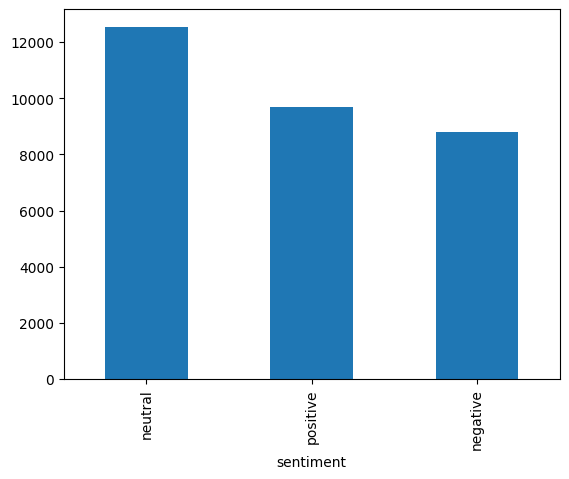

In [13]:
data['sentiment'].value_counts().plot(kind="bar")

In [14]:
data.head(2)

,sentiment,text
0,neutral,"I`d have responded, if I were going"
1,negative,Sooo SAD I will miss you here in San Diego!!!


In [15]:
#lower case
data['text'] = data['text'].str.lower()
data.head(2)

,sentiment,text
0,neutral,"i`d have responded, if i were going"
1,negative,sooo sad i will miss you here in san diego!!!


# [Dataset 2 Figshare](https://figshare.com/articles/dataset/Twitter_dataset/28390334)

target: the polarity of the tweet 

In [16]:
data_2 =pd.read_csv("data/twitter_training.csv", encoding="latin1", header= None)
data_2_2 =pd.read_csv("data/twitter_validation.csv", encoding="latin1", header= None)

In [17]:
data_2.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [18]:
data_2_2.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [19]:
data_2 = pd.concat([data_2, data_2_2], ignore_index=True)

In [20]:
# Rename the column 'clean_text' to 'text'
data_2.rename(columns= {3: 'text'}, inplace=True)
data_2.rename(columns={2: 'sentiment'}, inplace=True)

In [21]:
data_2 = data_2[roi]
data_2.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [22]:
#lower case
data_2['text'] = data_2['text'].str.lower()

In [23]:
data_2['check'] = data_2['text'].isin(data['text'])
counts = data_2['check'].value_counts()
# You can also print specific counts:
print(f"\nNumber of True values: {counts.get(True, 0)}")
print(f"Number of False values: {counts.get(False, 0)}")


Number of True values: 10
Number of False values: 75672


In [24]:
data_2[data_2['check']==True]

,sentiment,text,check
2659,Irrelevant,shut up.,True
2660,Irrelevant,shut up.,True
17949,Positive,thank you,True
22425,Positive,i miss you,True
41438,Irrelevant,happy birthday.,True
46989,Positive,good morning!,True
53463,Negative,thank you,True
55001,Positive,thank you,True
71364,Positive,thank you,True
71366,Positive,thank you,True


In [25]:
data_2 = data_2[data_2['check']==False]

## There are only 10 identical messages in both datasets

In [26]:
data_2.sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [27]:
data_2.shape

(75672, 3)

In [28]:
counts = data_2['sentiment'].value_counts()
# You can also print specific counts:
print(f"\nNumber of Irrelevant values: {counts.get('Irrelevant', 0)}")
print(f"{round(counts.get('Irrelevant', 0)/ data_2.shape[0]*100, 2)} %")


Number of Irrelevant values: 13159
17.39 %


In [29]:
#Discard Irrelevant
data_2 = data_2[data_2['sentiment'] != 'Irrelevant']

In [30]:
data_2.head(1)

,sentiment,text,check
0,Positive,im getting on borderlands and i will murder yo...,False


In [31]:
data_2 = data_2[roi] 
data_2.head(1)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...


In [32]:
# a check
print(f' Null values sentiment :{data_2.sentiment.isnull().sum()}')
print(f' Null values text :{data_2.text.isnull().sum()}')

 Null values sentiment :0
 Null values text :571


In [33]:
# discard null value
data_2 = data_2.dropna()

In [34]:
data_2['sentiment'] = data_2['sentiment'].replace('Negative', 'negative')
data_2['sentiment'] = data_2['sentiment'].replace('Neutral', 'neutral')
data_2['sentiment'] = data_2['sentiment'].replace('Positive', 'positive')

<Axes: xlabel='sentiment'>

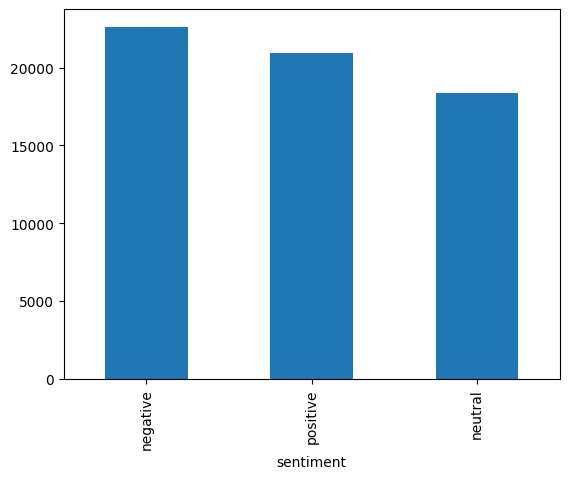

In [35]:
data_2['sentiment'].value_counts().plot(kind="bar")

# Merge the two dataset

In [36]:
data = pd.concat([data, data_2], ignore_index=True)

# Exploring sentiment labels distribution

<Axes: xlabel='sentiment'>

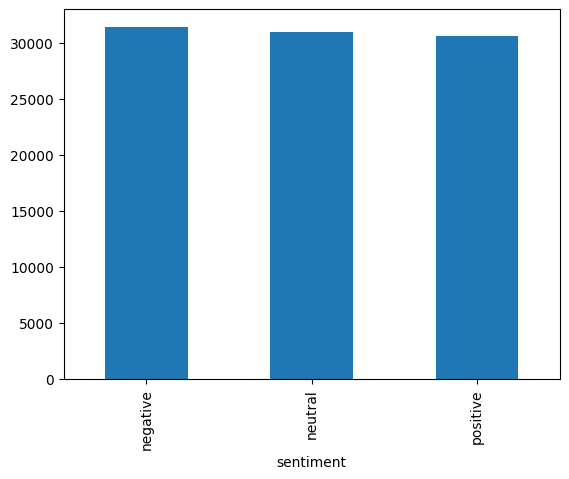

In [37]:
data['sentiment'].value_counts().plot(kind="bar")

### There are more neutral, so in order to create a balanced data, let's sampling

/tmp/ipykernel_22778/656222261.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop = True)))


<Axes: xlabel='sentiment'>

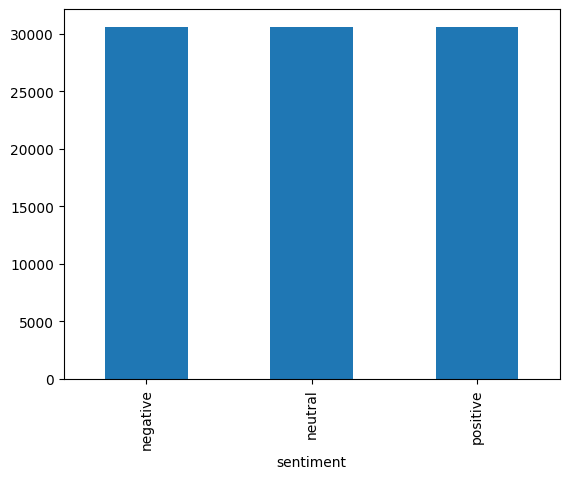

In [38]:
g = data.groupby('sentiment')
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop = True)))
data['sentiment'].value_counts().plot(kind = "bar")

# Remapping sentiment

| negative| neutral | positive|
|-|-|-|
| 0 | 1 | 2|

In [39]:
data['sentiment_int'] = LabelEncoder().fit_transform(data['sentiment'])
data.head()

sentiment                                               text  \
sentiment                                                                  
negative  0  negative  @ govlaurakelly please order masks in public (...   
          1  negative  buried under more web changes. going to make l...   
          2  negative         hacked on warzone... work on that... what.   
          3  negative               you were right, he also deserved it.   
          4  negative  nervous about going out tomorrow, cos its the ...   

             sentiment_int  
sentiment                   
negative  0              0  
          1              0  
          2              0  
          3              0  
          4              0

In [40]:
data[data.sentiment== 'negative'].head(1)

,,sentiment,text,sentiment_int
sentiment,,,,
negative,0,negative,@ govlaurakelly please order masks in public (...,0


In [41]:
data[data.sentiment== 'neutral'].head(1)

,,sentiment,text,sentiment_int
sentiment,,,,
neutral,0,neutral,twitch.tv/1trickporo. live 6pm aest. it's gong...,1


In [42]:
data[data.sentiment== 'positive'].head(1)

,,sentiment,text,sentiment_int
sentiment,,,,
positive,0,positive,wow,2


In [43]:
data = pd.DataFrame({
    "sentiment": data.sentiment_int.values,
    "text": data.text.values
})
data.head(2)

,sentiment,text
0,0,@ govlaurakelly please order masks in public (...
1,0,buried under more web changes. going to make l...


# Let's start the general cleaning

### #1. Removing emoji and lowering...

In [44]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [45]:
#remove emoji and set lowercase
data['text'] = data['text'].apply(lambda x: remove_emojis(x).lower())
data.head()

,sentiment,text
0,0,@ govlaurakelly please order masks in public (...
1,0,buried under more web changes. going to make l...
2,0,hacked on warzone... work on that... what.
3,0,"you were right, he also deserved it."
4,0,"nervous about going out tomorrow, cos its the ..."


### #2.Before removing punctuation and special char: adding semantic info

In [46]:
#before removing punctuation insert esclamation
data['text'] = data.apply(lambda x: re.sub( r"!", ' exclamation ', x['text']),axis=1)
data.head()

,sentiment,text
0,0,@ govlaurakelly please order masks in public (...
1,0,buried under more web changes. going to make l...
2,0,hacked on warzone... work on that... what.
3,0,"you were right, he also deserved it."
4,0,"nervous about going out tomorrow, cos its the ..."


In [47]:
#before removing punctuation insert question
data['text'] = data.apply(lambda x: re.sub( r"\?", ' question ', x['text'] ),axis=1)

In [48]:
# *** 
#update *** with censored
data['text'] = data.apply(lambda x: re.sub( r"\*{2,}", ' censored ', x['text']),axis=1)
data.head()

,sentiment,text
0,0,@ govlaurakelly please order masks in public (...
1,0,buried under more web changes. going to make l...
2,0,hacked on warzone... work on that... what.
3,0,"you were right, he also deserved it."
4,0,"nervous about going out tomorrow, cos its the ..."


### #3.Remove url or email

In [49]:
#remove url or email
pattern = r"(https?://\S+|@[A-Za-z0-9]+|\b[a-z0-9._%+-]+@[a-z0-9.-]+\.[a-z]{2,})\b"
data['text'] = data.apply(lambda x: re.sub( pattern, '', x['text']),axis=1)
data.head()


,sentiment,text
0,0,@ govlaurakelly please order masks in public (...
1,0,buried under more web changes. going to make l...
2,0,hacked on warzone... work on that... what.
3,0,"you were right, he also deserved it."
4,0,"nervous about going out tomorrow, cos its the ..."


### #4.Semplify interaction (ahahahah = ah)

In [50]:
#semplify interjections
data['text'] = data['text'].apply(lambda x: re.sub( r'a+h+', 'ah',x))
data['text'] = data['text'].apply(lambda x: re.sub( r'o+h+', 'oh',x))
data['text'] = data['text'].apply(lambda x: re.sub( r'u+h+','uh',x))
data.head()


,sentiment,text
0,0,@ govlaurakelly please order masks in public (...
1,0,buried under more web changes. going to make l...
2,0,hacked on warzone... work on that... what.
3,0,"you were right, he also deserved it."
4,0,"nervous about going out tomorrow, cos its the ..."


### #5.Remove punctuation

In [51]:
#remove any punctuaction
data['text'] = data.apply(lambda x: re.sub( r"([^\w\s])", ' ', x['text'] ), axis=1)
data.head(3)

,sentiment,text
0,0,govlaurakelly please order masks in public ...
1,0,buried under more web changes going to make l...
2,0,hacked on warzone work on that what


### #6.Remove extra space

In [52]:
data.columns

Index(['sentiment', 'text'], dtype='object')

In [53]:
#remove extra space
pattern = r"\s+"
data['text'] = data.apply(lambda x: re.sub( pattern, ' ', x['text']),axis=1)
#data.drop(columns=['text_clean_nourl','text'], inplace=True)
data.head()

,sentiment,text
0,0,govlaurakelly please order masks in public ex...
1,0,buried under more web changes going to make lu...
2,0,hacked on warzone work on that what
3,0,you were right he also deserved it
4,0,nervous about going out tomorrow cos its the f...


In [54]:
data.head(5)

,sentiment,text
0,0,govlaurakelly please order masks in public ex...
1,0,buried under more web changes going to make lu...
2,0,hacked on warzone work on that what
3,0,you were right he also deserved it
4,0,nervous about going out tomorrow cos its the f...


In [55]:
len(data.text.unique())

86291

In [56]:
data.shape

(91833, 2)

In [57]:
#redundant values
data.shape[0] - len(data.text.unique())

5542

In [58]:
#remove redundant values
data = data.drop_duplicates(subset=['text'], keep='first')
data.shape

(86291, 2)

In [59]:
'''data = data[['text_clean_no_punct', 'sentiment_int']]
data.rename(columns={'text_clean_no_punct': 'text', 'sentiment_int':'sentiment'}, inplace=True)
data.head(1)'''

"data = data[['text_clean_no_punct', 'sentiment_int']]\ndata.rename(columns={'text_clean_no_punct': 'text', 'sentiment_int':'sentiment'}, inplace=True)\ndata.head(1)"

In [60]:
data['text'] = data['text'].astype(str)

# Make train, validation and test set

 - 80% train: 
    - 90% train
    - 10% validation
- 20% test

In [61]:
# TRAIN & TEST
train_split, test_split = train_test_split(data, train_size = 0.8, random_state=41)
# TRAIN and VALIDATION
train_split, val_split = train_test_split(train_split, train_size = 0.9, random_state=41)

In [62]:
train_split.head(2)

,sentiment,text
39101,1,i forget are you in edinburgh question check ...
46694,1,stewart voice nooooooo halt iiiiiiiit


In [63]:
val_split.head(2)

,sentiment,text
8415,0,i worry i usually never get angry but the last...
9085,0,don t use windows 10 it s a privacytools don ...


In [64]:
test_split.head(2)

,sentiment,text
14896,0,my 2080 super feels really inadequate from
42145,1,back to work exclamation


In [65]:
train_split.info()
val_split.info()
test_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62128 entries, 39101 to 69005
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  62128 non-null  int64 
 1   text       62128 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 6904 entries, 8415 to 68798
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6904 non-null   int64 
 1   text       6904 non-null   object
dtypes: int64(1), object(1)
memory usage: 161.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 17259 entries, 14896 to 80203
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  17259 non-null  int64 
 1   text       17259 non-null  object
dtypes: int64(1), object(1)
memory usage: 404.5+ KB


# Save our sets

In [66]:
%pwd

'/home/profpao/Scrivania/Sentiment_Analysis_comparing_strategies'

In [67]:
train_split.to_csv("data/my_train.csv")
val_split.to_csv("data/my_val.csv")
test_split.to_csv("data/my_test.csv")